In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


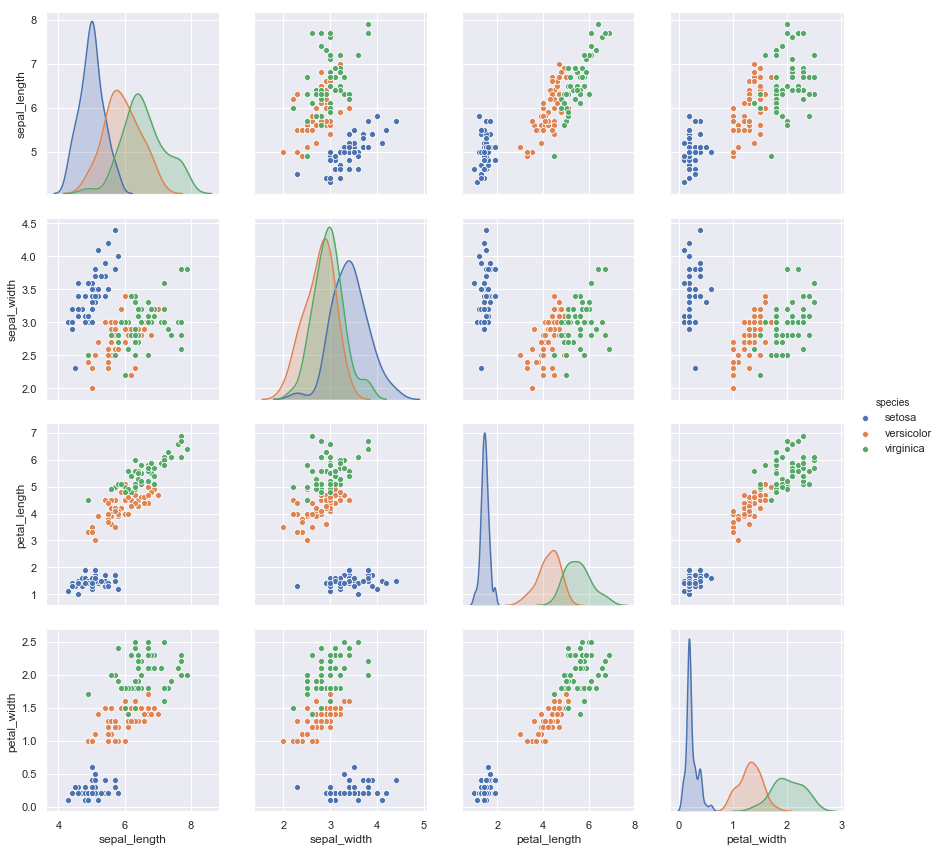

In [2]:
%matplotlib inline
sns.set()
sns.pairplot(iris, hue='species', height=3)


In [3]:
X_iris = iris.drop('species', axis=1)
X_iris.shape


(150, 4)

In [4]:
y_iris = iris['species']
y_iris.shape

(150,)

### How to work with Sklearn

**Key steps**:
1. Choose a class of a model
2. Choose a model hyperparameters
3. Arrange data into a feutures matrix
4. Fit the model
5. Apply the model to new data

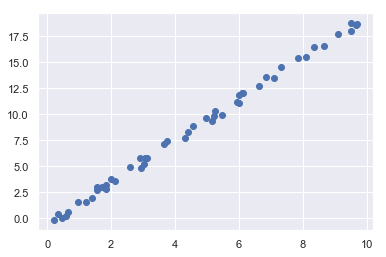

In [5]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2*x -1 +rng.rand(50)
plt.scatter(x, y)



In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
X_2 = x[:, np.newaxis]
X_2.shape

(50, 1)

In [9]:
model.fit(X_2, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
model.coef_

array([2.00660766])

In [11]:
model.intercept_

-0.5350275750800026

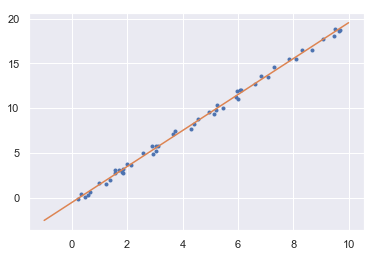

In [12]:
xfit = np.linspace(-1, 10)

Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

plt.plot(x, y, '.')
plt.plot(xfit, yfit)


In [13]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [14]:
from sklearn.naive_bayes import GaussianNB   #1. choose the model
model = GaussianNB()                         #2. instantiate model
model.fit(Xtrain, ytrain)                    #3. fit model to data
y_model = model.predict(Xtest)               #4. predict on new data

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)


0.9736842105263158

### Unsupervised


In [16]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

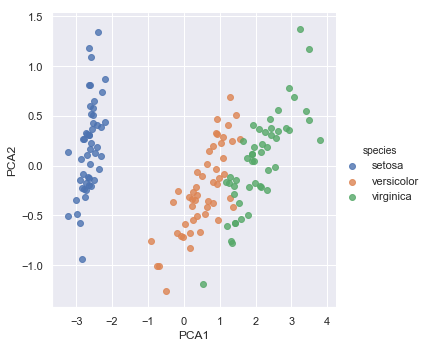

In [17]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2",hue='species',data= iris, fit_reg=False )

In [47]:
from sklearn.mixture import GaussianMixture as GMM
model = GMM(n_components = 3, covariance_type = 'full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)


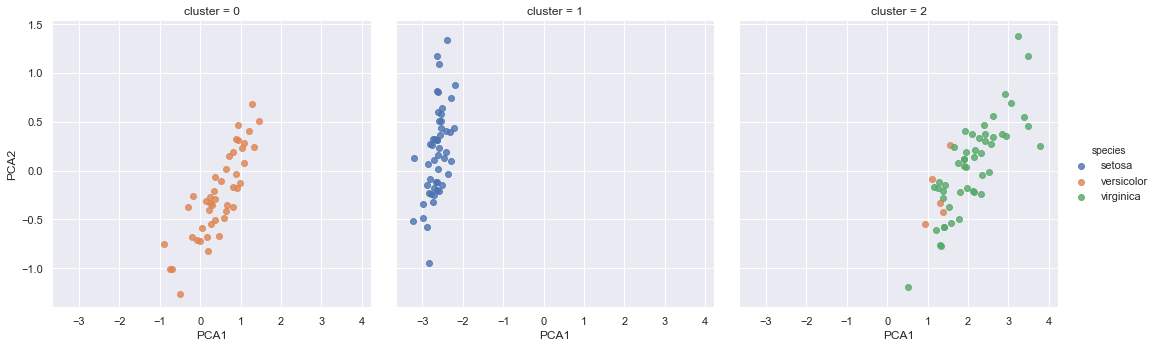

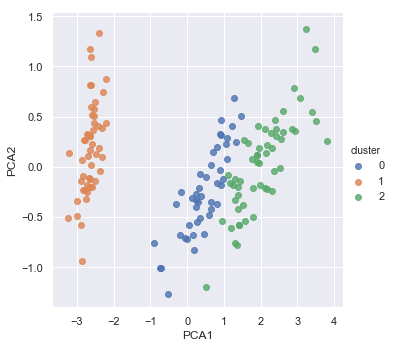

In [48]:
iris['cluster'] = y_gmm
sns.lmplot('PCA1', 'PCA2', data=iris, hue='species', 
          col='cluster', fit_reg=False)
sns.lmplot('PCA1', 'PCA2', data=iris, fit_reg=False, hue='cluster')

### Handwritten Digits


In [50]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

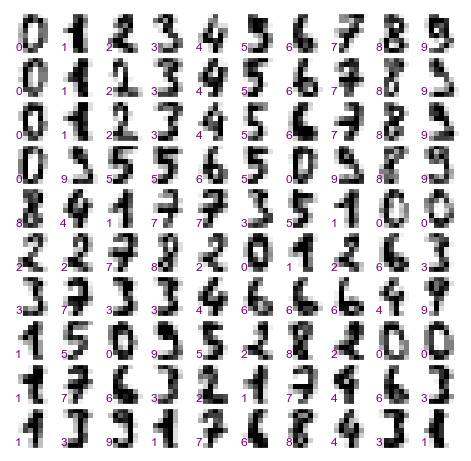

In [53]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10,10, figsize=(8,8),
                        subplot_kw = {'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
           transform = ax.transAxes, color='purple')
    

In [55]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(digits.data)
X_2D = model.transform(digits.data)


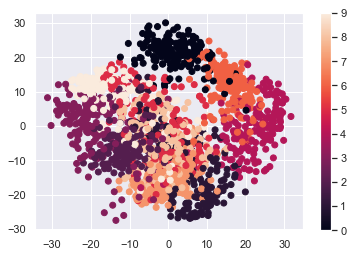

In [69]:
plt.scatter(X_2D[:,0], X_2D[:,1], c = digits.target)
plt.colorbar()

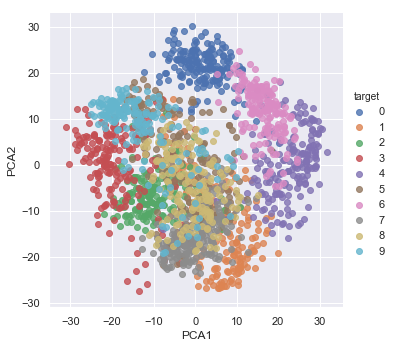

In [98]:
df_dig = pd.DataFrame({'PCA1': X_2D[:,0], 'PCA2':X_2D[:,1],'target': digits.target})
df_dig.head()
sns.lmplot('PCA1', 'PCA2', data=df_dig, hue='target', fit_reg=False )

In [82]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

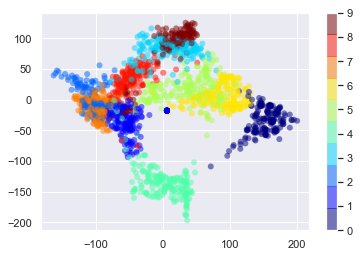

In [100]:
plt.scatter(data_projected[:,0], data_projected[:,1], c = digits.target,
           edgecolor='none', alpha=0.5,
           cmap = plt.cm.get_cmap('jet', 10))
plt.colorbar()
plt.clim=(0.5, 9.5)


#### Classification digits

In [126]:
X = digits.data
y = digits.target
print(X.shape, y.shape)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

(1797, 64) (1797,)


In [127]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [128]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)


0.8533333333333334

Text(89.18, 0.5, 'true value')

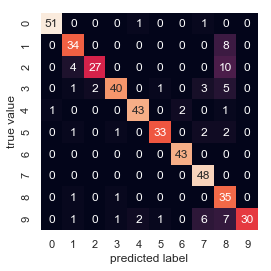

In [135]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted label')
plt.ylabel('true value')

(450, 8, 8)


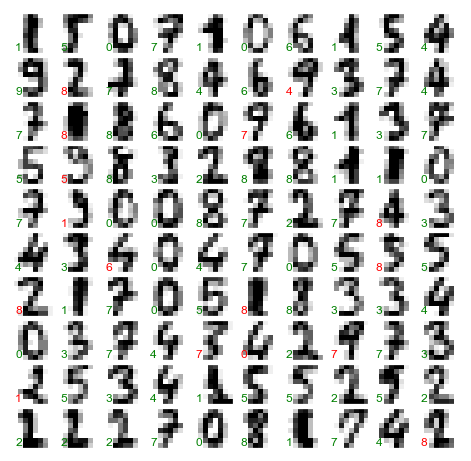

In [138]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')